### <span style="color:#2E6F40;">**Importing the Dependencies**</span>

In [2]:
import requests
import pandas as pd
import pycountry
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore common warnings
import warnings
warnings.filterwarnings('ignore')

# <span style="color:#2E6F40;">**Step 1: 📥 Dataset Overview & Collection**</span>
We are going to collect data from **4 public WHO API endpoints**:

1. **Obesity data for adults**  
   ➤ URL: [`https://ghoapi.azureedge.net/api/NCD_BMI_30C`](https://ghoapi.azureedge.net/api/NCD_BMI_30C)

2. **Obesity data for children**  
   ➤ URL: [`https://ghoapi.azureedge.net/api/NCD_BMI_PLUS2C`](https://ghoapi.azureedge.net/api/NCD_BMI_PLUS2C)

3. **Underweight data for adults**  
   ➤ URL: [`https://ghoapi.azureedge.net/api/NCD_BMI_18C`](https://ghoapi.azureedge.net/api/NCD_BMI_18C)

4. **Underweight data for children**  
   ➤ URL: [`https://ghoapi.azureedge.net/api/NCD_BMI_MINUS2C`](https://ghoapi.azureedge.net/api/NCD_BMI_MINUS2C)

### <span style="color:#2E6F40;">**Define function for converting API data into dataframe**</span>

In [5]:
def convert_dataframe(url):
    result = requests.get(url)
    data = result.json()
    df = pd.DataFrame(data['value'])
    return df

### <span style="color:#2E6F40;">**1. Load all 4 datasets into dataframe**</span>

#### <span style="color:#4272FF;">**1. Obesity data for adults**</span>

In [8]:
url = "https://ghoapi.azureedge.net/api/NCD_BMI_30C"
obesity_adults = convert_dataframe(url)
obesity_adults.head(2)

,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,TimeDim,Dim1,...,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,257,NCD_BMI_30C,COUNTRY,KHM,WPR,YEAR,Western Pacific,SEX,2001,SEX_BTSX,...,None,1.0 [0.8-1.3],0.98170,0.75674,1.27487,None,2024-02-29T16:06:41.017+01:00,2001,2001-01-01T00:00:00+01:00,2001-12-31T00:00:00+01:00
1,350,NCD_BMI_30C,COUNTRY,IRN,EMR,YEAR,Eastern Mediterranean,SEX,2020,SEX_MLE,...,None,17.5 [15.8-19.2],17.48764,15.79378,19.24573,None,2024-02-29T16:06:41.017+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00


#### <span style="color:#4272FF;">**2. Obesity data for children**</span>

In [10]:
url = "https://ghoapi.azureedge.net/api/NCD_BMI_PLUS2C"
obesity_children = convert_dataframe(url)
obesity_children.head(2)

,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,Dim1,TimeDim,...,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,9055259,NCD_BMI_PLUS2C,COUNTRY,OMN,EMR,YEAR,Eastern Mediterranean,SEX,SEX_BTSX,1996,...,None,5.8 [3.2-9.4],5.79219,3.16773,9.42838,None,2024-02-29T16:06:41.017+01:00,1996,1996-01-01T00:00:00+01:00,1996-12-31T00:00:00+01:00
1,9055643,NCD_BMI_PLUS2C,COUNTRY,IRL,EUR,YEAR,Europe,SEX,SEX_FMLE,2014,...,None,8.5 [7.4-9.8],8.50868,7.35525,9.75413,None,2024-02-29T16:06:41.017+01:00,2014,2014-01-01T00:00:00+01:00,2014-12-31T00:00:00+01:00


#### <span style="color:#4272FF;">**3. Underweight data for adults**</span>

In [12]:
url = "https://ghoapi.azureedge.net/api/NCD_BMI_18C"
underweight_adults = convert_dataframe(url)
underweight_adults.head(2)

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,TimeDim,Dim1,...,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,53,NCD_BMI_18C,COUNTRY,GAB,YEAR,AFR,Africa,SEX,2021,SEX_FMLE,...,None,5.8 [4.0-8.1],5.79511,3.97204,8.07702,None,2024-02-29T16:06:41.017+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00
1,405,NCD_BMI_18C,COUNTRY,TUV,YEAR,WPR,Western Pacific,SEX,2001,SEX_BTSX,...,None,0.9 [0.4-1.9],0.93657,0.36515,1.85929,None,2024-02-29T16:06:41.017+01:00,2001,2001-01-01T00:00:00+01:00,2001-12-31T00:00:00+01:00


#### <span style="color:#4272FF;">**4. Underweight data for children**</span>

In [14]:
url = "https://ghoapi.azureedge.net/api/NCD_BMI_MINUS2C"
underweight_children = convert_dataframe(url)
underweight_children.head(2)

,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,TimeDim,Dim1,...,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,9055211,NCD_BMI_MINUS2C,COUNTRY,SLB,WPR,YEAR,Western Pacific,SEX,1993,SEX_FMLE,...,None,1.5 [0.4-3.7],1.51822,0.38915,3.72488,None,2024-02-29T16:06:41.017+01:00,1993,1993-01-01T00:00:00+01:00,1993-12-31T00:00:00+01:00
1,9055251,NCD_BMI_MINUS2C,GLOBAL,GLOBAL,None,YEAR,None,SEX,1998,SEX_FMLE,...,None,9.8 [9.2-10.4],9.82690,9.22881,10.42875,None,2024-05-23T13:28:38.2+02:00,1998,1998-01-01T00:00:00+01:00,1998-12-31T00:00:00+01:00


### <span style="color:#2E6F40;">**🔄 Preprocessing Steps**</span>

#### <span style="color:#4272FF;">**2. Add a new column <u>*age_group*</u> to distinguish adults and children**</span>

In [17]:
obesity_adults['age_group'] = 'adult'
obesity_children['age_group'] = 'children'
underweight_adults['age_group'] = 'adult'
underweight_children['age_group'] = 'children'

In [18]:
# verify one df
print(obesity_adults.columns)
obesity_adults.head(2)

Index(['Id', 'IndicatorCode', 'SpatialDimType', 'SpatialDim',
       'ParentLocationCode', 'TimeDimType', 'ParentLocation', 'Dim1Type',
       'TimeDim', 'Dim1', 'Dim2Type', 'Dim2', 'Dim3Type', 'Dim3',
       'DataSourceDimType', 'DataSourceDim', 'Value', 'NumericValue', 'Low',
       'High', 'Comments', 'Date', 'TimeDimensionValue', 'TimeDimensionBegin',
       'TimeDimensionEnd', 'age_group'],
      dtype='object')


,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,TimeDim,Dim1,...,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,age_group
0,257,NCD_BMI_30C,COUNTRY,KHM,WPR,YEAR,Western Pacific,SEX,2001,SEX_BTSX,...,1.0 [0.8-1.3],0.98170,0.75674,1.27487,None,2024-02-29T16:06:41.017+01:00,2001,2001-01-01T00:00:00+01:00,2001-12-31T00:00:00+01:00,adult
1,350,NCD_BMI_30C,COUNTRY,IRN,EMR,YEAR,Eastern Mediterranean,SEX,2020,SEX_MLE,...,17.5 [15.8-19.2],17.48764,15.79378,19.24573,None,2024-02-29T16:06:41.017+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00,adult


#### <span style="color:#4272FF;">**3. Combine the two obesity datasets into one dataframe called <u>*df_obesity*</u>**</span>

In [20]:
print(obesity_adults.shape)
print(obesity_children.shape)

(20790, 26)
(62370, 26)


In [21]:
# concat two dataframe
df_obesity = pd.concat([obesity_adults, obesity_children], ignore_index=True, sort=False)

In [22]:
df_obesity.shape

(83160, 26)

In [23]:
df_obesity['age_group'].value_counts()

age_group
children    62370
adult       20790
Name: count, dtype: int64

#### <span style="color:#4272FF;">**4. Combine the two malnutrition datasets into one dataframe called <u>*df_malnutrition*</u>**</span>

In [25]:
print(underweight_adults.shape)
print(underweight_children.shape)

(20790, 26)
(62370, 26)


In [26]:
# concat two dataframe
df_malnutrition = pd.concat([underweight_adults, underweight_children], ignore_index=True, sort=False)

In [27]:
df_malnutrition.shape

(83160, 26)

In [28]:
df_malnutrition['age_group'].value_counts()

age_group
children    62370
adult       20790
Name: count, dtype: int64

#### <span style="color:#4272FF;">**5. Filter each dataset to include only records from the years <u>*2012 to 2022*</u>**</span>

In [30]:
df_obesity = df_obesity[(df_obesity['TimeDim'] >= 2012) & (df_obesity['TimeDim'] <= 2022)]

In [31]:
print(df_obesity.shape)
df_obesity['age_group'].value_counts()

(27720, 26)


age_group
children    20790
adult        6930
Name: count, dtype: int64

In [32]:
df_malnutrition = df_malnutrition[(df_malnutrition['TimeDim'] >= 2012) & (df_malnutrition['TimeDim'] <= 2022)]

In [33]:
print(df_malnutrition.shape)
df_malnutrition['age_group'].value_counts()

(27720, 26)


age_group
children    20790
adult        6930
Name: count, dtype: int64

# <span style="color:#2E6F40;">**Step 2: 🧹 Data Cleaning & Feature Engineering**</span>

#### <span style="color:#4272FF;">**Keep necessary columns**</span>

In [36]:
df_obesity.columns

Index(['Id', 'IndicatorCode', 'SpatialDimType', 'SpatialDim',
       'ParentLocationCode', 'TimeDimType', 'ParentLocation', 'Dim1Type',
       'TimeDim', 'Dim1', 'Dim2Type', 'Dim2', 'Dim3Type', 'Dim3',
       'DataSourceDimType', 'DataSourceDim', 'Value', 'NumericValue', 'Low',
       'High', 'Comments', 'Date', 'TimeDimensionValue', 'TimeDimensionBegin',
       'TimeDimensionEnd', 'age_group'],
      dtype='object')

In [37]:
df_obesity = df_obesity[['ParentLocation', 'Dim1', 'TimeDim', 'Low', 'High', 'NumericValue', 'SpatialDim', 'age_group']]
df_obesity.sample(2)

,ParentLocation,Dim1,TimeDim,Low,High,NumericValue,SpatialDim,age_group
36312,Europe,SEX_FMLE,2020,3.11111,7.71557,5.13337,BEL,children
14577,Europe,SEX_MLE,2016,29.47711,35.16671,32.30771,HUN,adult


In [38]:
df_malnutrition = df_malnutrition[['ParentLocation', 'Dim1', 'TimeDim', 'Low', 'High', 'NumericValue', 'SpatialDim', 'age_group']]
df_obesity.sample(2)

,ParentLocation,Dim1,TimeDim,Low,High,NumericValue,SpatialDim,age_group
59016,Western Pacific,SEX_MLE,2016,12.94410,14.87192,13.88288,KOR,children
27582,Americas,SEX_MLE,2016,3.60209,30.93920,14.74740,HND,children


#### <span style="color:#4272FF;">**Rename Columns**</span>

In [40]:
new_columns = {'TimeDim': 'Year', 'Dim1': 'Gender', 'NumericValue': 'Mean_Estimate',
               'Low': 'LowerBound', 'High': 'UpperBound', 'ParentLocation': 'Region',
              'SpatialDim': 'Country'}
df_obesity = df_obesity.rename(columns=new_columns)
df_obesity.sample(2)

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group
44993,Africa,SEX_FMLE,2017,3.39224,10.87384,6.52628,SWZ,children
29869,Africa,SEX_MLE,2014,1.13542,3.64750,2.16003,NGA,children


In [41]:
df_malnutrition = df_malnutrition.rename(columns=new_columns)
df_malnutrition.sample(2)

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group
42941,Americas,SEX_FMLE,2021,0.59465,8.17156,3.03293,VEN,children
52397,Americas,SEX_BTSX,2015,1.85976,8.75397,4.50654,SUR,children


#### <span style="color:#4272FF;">**Convert Country Codes to Full Names using <u>*pycountry*</u>**</span>

In [43]:
# Define a function to convert the 3-letter codes to full names
def country_conversion(code):
    special_cases = {
                    'GLOBAL': 'Global',
                    'WB_LMI': 'Low & Middle Income',
                    'WB_HI': 'High Income',
                    'WB_LI': 'Low Income',
                    'EMR': 'Eastern Mediterranean Region',
                    'EUR': 'Europe',
                    'AFR': 'Africa',
                    'SEAR': 'South-East Asia Region',
                    'WPR': 'Western Pacific Region',
                    'AMR': 'Americas Region',
                    'WB_UMI': 'Upper Middle Income'}
    if code in special_cases:
        return special_cases[code]
    else:
        country_details = pycountry.countries.get(alpha_3 = code)
        country_name = country_details.name
        return country_name

In [44]:
df_obesity['Country'] = df_obesity['Country'].apply(country_conversion)

In [45]:
df_obesity.sample(2)

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group
12570,Western Pacific,SEX_FMLE,2020,22.59727,28.49425,25.45226,Malaysia,adult
52981,Western Pacific,SEX_BTSX,2016,1.72748,2.73416,2.18284,Viet Nam,children


In [46]:
df_malnutrition['Country'] = df_malnutrition['Country'].apply(country_conversion)

In [47]:
df_malnutrition.sample(2)

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group
56994,Africa,SEX_BTSX,2014,1.51067,6.93350,3.59924,Zambia,children
51476,Eastern Mediterranean,SEX_FMLE,2014,4.62658,9.84555,6.97370,Afghanistan,children


#### <span style="color:#4272FF;">**New Columns Creation**</span>

- **CI_Width column creation**

In [50]:
df_obesity['CI_Width'] = df_obesity['UpperBound'] - df_obesity['LowerBound']
df_malnutrition['CI_Width'] = df_malnutrition['UpperBound'] - df_malnutrition['LowerBound']

- **obesity_level column creation - (for the obesity table only)**

In [52]:
# Define function to categorize the obesity_level
def obesity_level(value):
    if value >= 30:
        return 'High'
    elif value < 25:
        return 'Low'
    else:
        return 'Moderate'

In [53]:
df_obesity['Obesity_level'] = df_obesity['Mean_Estimate'].apply(obesity_level)
df_obesity.head()

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group,CI_Width,Obesity_level
1,Eastern Mediterranean,SEX_MLE,2020,15.79378,19.24573,17.48764,"Iran, Islamic Republic of",adult,3.45195,Low
8,Eastern Mediterranean,SEX_MLE,2020,23.08959,33.81534,28.33553,Iraq,adult,10.72575,Moderate
14,Europe,SEX_FMLE,2014,24.92477,31.21326,27.94870,Greenland,adult,6.28849,Moderate
16,Europe,SEX_FMLE,2019,28.16068,35.57493,31.89322,Armenia,adult,7.41425,High
17,Europe,SEX_BTSX,2018,29.90581,37.47086,33.69421,Malta,adult,7.56505,High


- **Malnutrition_Level column creation - (for the malnutrition table only)**

In [55]:
# Define function to categorize the Malnutrition_Level
def malnutrition_level(value):
    if value >= 20:
        return 'High'
    elif value < 10:
        return 'Low'
    else:
        return 'Moderate'

In [56]:
df_malnutrition['Malnutrition_Level'] = df_malnutrition['Mean_Estimate'].apply(malnutrition_level)
df_malnutrition.head()

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group,CI_Width,Malnutrition_Level
0,Africa,SEX_FMLE,2021,3.97204,8.07702,5.79511,Gabon,adult,4.10498,Low
4,Western Pacific,SEX_BTSX,2017,2.42823,3.84215,3.09065,Mongolia,adult,1.41392,Low
5,Africa,SEX_FMLE,2016,6.65567,10.25312,8.37172,Sierra Leone,adult,3.59745,Low
7,None,SEX_BTSX,2021,12.24232,14.44287,13.33635,South-East Asia Region,adult,2.20055,Moderate
9,Eastern Mediterranean,SEX_MLE,2014,1.25384,3.51682,2.20807,Qatar,adult,2.26298,Low


#### <span style="color:#4272FF;">**Feature Engineering For Gender Column**</span>

In [58]:
df_obesity.Gender.value_counts()

Gender
SEX_MLE     9240
SEX_FMLE    9240
SEX_BTSX    9240
Name: count, dtype: int64

In [59]:
df_obesity['Gender'] = df_obesity['Gender'].apply(lambda x: 'Male' if x == 'SEX_MLE' else
                                                  'Female' if x == 'SEX_FMLE' else 'Both')

In [60]:
df_obesity.Gender.value_counts()

Gender
Male      9240
Female    9240
Both      9240
Name: count, dtype: int64

In [61]:
df_obesity.head(3)

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group,CI_Width,Obesity_level
1,Eastern Mediterranean,Male,2020,15.79378,19.24573,17.48764,"Iran, Islamic Republic of",adult,3.45195,Low
8,Eastern Mediterranean,Male,2020,23.08959,33.81534,28.33553,Iraq,adult,10.72575,Moderate
14,Europe,Female,2014,24.92477,31.21326,27.94870,Greenland,adult,6.28849,Moderate


In [62]:
df_malnutrition['Gender'] = df_malnutrition['Gender'].apply(lambda x: 'Male' if x == 'SEX_MLE' else
                                                            'Female' if x == 'SEX_FMLE' else 'Both')

In [63]:
df_malnutrition.Gender.value_counts()

Gender
Female    9240
Both      9240
Male      9240
Name: count, dtype: int64

In [64]:
df_malnutrition.head(3)

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group,CI_Width,Malnutrition_Level
0,Africa,Female,2021,3.97204,8.07702,5.79511,Gabon,adult,4.10498,Low
4,Western Pacific,Both,2017,2.42823,3.84215,3.09065,Mongolia,adult,1.41392,Low
5,Africa,Female,2016,6.65567,10.25312,8.37172,Sierra Leone,adult,3.59745,Low


#### <span style="color:#4272FF;">**Feature Engineering For Year Column**</span>

In [66]:
df_obesity['Year'] = pd.to_datetime(df_obesity['Year'], format='%Y')
df_obesity['Year'] = df_obesity['Year'].dt.year

In [67]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27720 entries, 1 to 83154
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         26268 non-null  object 
 1   Gender         27720 non-null  object 
 2   Year           27720 non-null  int32  
 3   LowerBound     27720 non-null  float64
 4   UpperBound     27720 non-null  float64
 5   Mean_Estimate  27720 non-null  float64
 6   Country        27720 non-null  object 
 7   age_group      27720 non-null  object 
 8   CI_Width       27720 non-null  float64
 9   Obesity_level  27720 non-null  object 
dtypes: float64(4), int32(1), object(5)
memory usage: 2.2+ MB


# <span style="color:#2E6F40;">**Step:3 🧮 Exploratory Data Analysis (EDA)**</span>

#### <span style="color:#4272FF;">**Check the shape of the DataFrame**</span>

In [70]:
print(df_obesity.shape)
print(df_malnutrition.shape)

(27720, 10)
(27720, 10)


#### <span style="color:#4272FF;">**Preview the data**</span>
1. **Head**
2. **Tail**
3. **Sample**

- #### df_obesity

In [73]:
df_obesity.head() # First 5 or (n) rows

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group,CI_Width,Obesity_level
1,Eastern Mediterranean,Male,2020,15.79378,19.24573,17.48764,"Iran, Islamic Republic of",adult,3.45195,Low
8,Eastern Mediterranean,Male,2020,23.08959,33.81534,28.33553,Iraq,adult,10.72575,Moderate
14,Europe,Female,2014,24.92477,31.21326,27.94870,Greenland,adult,6.28849,Moderate
16,Europe,Female,2019,28.16068,35.57493,31.89322,Armenia,adult,7.41425,High
17,Europe,Both,2018,29.90581,37.47086,33.69421,Malta,adult,7.56505,High


In [74]:
df_obesity.tail() # Last 5 or (n) rows

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group,CI_Width,Obesity_level
83137,Europe,Both,2020,0.96418,2.19743,1.47593,Tajikistan,children,1.23325,Low
83140,Eastern Mediterranean,Female,2012,0.30204,5.87241,1.96619,Somalia,children,5.57037,Low
83148,Western Pacific,Male,2021,3.32590,34.87782,16.63489,Vanuatu,children,31.55192,Low
83151,Africa,Male,2014,0.23648,6.34118,2.03219,Madagascar,children,6.10470,Low
83154,Europe,Male,2017,10.08785,12.76015,11.39063,Finland,children,2.67230,Low


In [75]:
df_obesity.sample(3) # Random (n) rows

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group,CI_Width,Obesity_level
32903,Europe,Both,2016,2.69008,15.90030,7.93528,Iceland,children,13.21022,Low
54682,Africa,Both,2015,1.21221,6.16761,2.91589,Gambia,children,4.95540,Low
32507,Europe,Female,2014,5.06349,8.46061,6.65532,Germany,children,3.39712,Low


- #### df_malnutrition

In [77]:
df_malnutrition.head() # First 5 or (n) rows

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group,CI_Width,Malnutrition_Level
0,Africa,Female,2021,3.97204,8.07702,5.79511,Gabon,adult,4.10498,Low
4,Western Pacific,Both,2017,2.42823,3.84215,3.09065,Mongolia,adult,1.41392,Low
5,Africa,Female,2016,6.65567,10.25312,8.37172,Sierra Leone,adult,3.59745,Low
7,None,Both,2021,12.24232,14.44287,13.33635,South-East Asia Region,adult,2.20055,Moderate
9,Eastern Mediterranean,Male,2014,1.25384,3.51682,2.20807,Qatar,adult,2.26298,Low


In [78]:
df_malnutrition.tail() # Last 5 or (n) rows

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group,CI_Width,Malnutrition_Level
83147,Americas,Female,2013,2.79550,5.71434,4.14069,Haiti,children,2.91884,Low
83149,Europe,Both,2018,5.42817,10.21840,7.57499,Tajikistan,children,4.79023,Low
83150,Western Pacific,Both,2016,0.62172,3.50706,1.70365,Papua New Guinea,children,2.88534,Low
83156,Western Pacific,Female,2020,0.06415,2.81018,0.73407,Samoa,children,2.74603,Low
83159,Europe,Male,2018,0.46517,7.30748,2.54279,Iceland,children,6.84231,Low


In [79]:
df_malnutrition.sample(3) # Random (n) rows

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group,CI_Width,Malnutrition_Level
34219,Eastern Mediterranean,Male,2018,2.67242,6.42185,4.33400,Jordan,children,3.74943,Low
55941,Western Pacific,Female,2020,0.11041,2.95644,0.92937,Papua New Guinea,children,2.84603,Low
67110,Western Pacific,Female,2020,0.06751,2.17387,0.64691,Tokelau,children,2.10636,Low


#### <span style="color:#4272FF;">**Checking the basic information about the dataframe**</span>

In [81]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27720 entries, 1 to 83154
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         26268 non-null  object 
 1   Gender         27720 non-null  object 
 2   Year           27720 non-null  int32  
 3   LowerBound     27720 non-null  float64
 4   UpperBound     27720 non-null  float64
 5   Mean_Estimate  27720 non-null  float64
 6   Country        27720 non-null  object 
 7   age_group      27720 non-null  object 
 8   CI_Width       27720 non-null  float64
 9   Obesity_level  27720 non-null  object 
dtypes: float64(4), int32(1), object(5)
memory usage: 2.2+ MB


In [82]:
df_malnutrition.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27720 entries, 0 to 83159
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Region              26268 non-null  object 
 1   Gender              27720 non-null  object 
 2   Year                27720 non-null  int64  
 3   LowerBound          27720 non-null  float64
 4   UpperBound          27720 non-null  float64
 5   Mean_Estimate       27720 non-null  float64
 6   Country             27720 non-null  object 
 7   age_group           27720 non-null  object 
 8   CI_Width            27720 non-null  float64
 9   Malnutrition_Level  27720 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.3+ MB


#### <span style="color:#4272FF;">**Basic statistics measures for the numeric columns**</span>

In [84]:
df_obesity.describe()

,Year,LowerBound,UpperBound,Mean_Estimate,CI_Width
count,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000
mean,2017.000000,9.393155,17.068489,12.761041,7.675334
std,3.162335,9.893854,12.395013,10.858925,6.616899
min,2012.000000,0.077540,0.547850,0.265670,0.216700
25%,2014.000000,2.354430,7.875503,4.753960,2.926715
50%,2017.000000,6.506535,13.704380,9.944540,5.480535
75%,2020.000000,12.697755,23.986050,17.482418,10.338880
max,2022.000000,74.365370,87.868510,80.609250,40.554060


In [85]:
df_malnutrition.describe()

,Year,LowerBound,UpperBound,Mean_Estimate,CI_Width
count,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000
mean,2017.000000,3.397094,8.147889,5.354451,4.750795
std,3.162335,3.908061,6.443692,4.811220,4.257684
min,2012.000000,0.023700,0.354830,0.175310,0.166680
25%,2014.000000,1.053662,3.143305,2.039283,1.603222
50%,2017.000000,1.907975,6.095555,3.597790,3.351095
75%,2020.000000,4.186443,11.526302,7.335245,6.530875
max,2022.000000,31.365400,43.680290,35.894110,26.701740


#### <span style="color:#4272FF;">**Check the Missing Values**</span>

In [87]:
df_obesity.isnull().sum()

Region           1452
Gender              0
Year                0
LowerBound          0
UpperBound          0
Mean_Estimate       0
Country             0
age_group           0
CI_Width            0
Obesity_level       0
dtype: int64

In [88]:
# Calculate missing percentage
(df_obesity.isnull().sum()/len(df_obesity))*100

Region           5.238095
Gender           0.000000
Year             0.000000
LowerBound       0.000000
UpperBound       0.000000
Mean_Estimate    0.000000
Country          0.000000
age_group        0.000000
CI_Width         0.000000
Obesity_level    0.000000
dtype: float64

- #### Only 5% of the data is missing in the "region" column.
- #### Since this is an important column, we cannot fill the missing values using the mode.
- #### Therefore, we will remove all rows with missing values in this column.

In [90]:
df_obesity = df_obesity.dropna(subset=['Region'])
df_obesity.isnull().sum()

Region           0
Gender           0
Year             0
LowerBound       0
UpperBound       0
Mean_Estimate    0
Country          0
age_group        0
CI_Width         0
Obesity_level    0
dtype: int64

In [91]:
df_malnutrition.isnull().sum()

Region                1452
Gender                   0
Year                     0
LowerBound               0
UpperBound               0
Mean_Estimate            0
Country                  0
age_group                0
CI_Width                 0
Malnutrition_Level       0
dtype: int64

In [92]:
# Calculate missing percentage
(df_malnutrition.isnull().sum()/len(df_malnutrition))*100

Region                5.238095
Gender                0.000000
Year                  0.000000
LowerBound            0.000000
UpperBound            0.000000
Mean_Estimate         0.000000
Country               0.000000
age_group             0.000000
CI_Width              0.000000
Malnutrition_Level    0.000000
dtype: float64

- #### Only 5% of the data is missing in the "region" column.
- #### Since this is an important column, we cannot fill the missing values using the mode.
- #### Therefore, we will remove all rows with missing values in this column.

In [94]:
df_malnutrition = df_malnutrition.dropna(subset=['Region'])
df_malnutrition.isnull().sum()

Region                0
Gender                0
Year                  0
LowerBound            0
UpperBound            0
Mean_Estimate         0
Country               0
age_group             0
CI_Width              0
Malnutrition_Level    0
dtype: int64

#### <span style="color:#4272FF;">**See unique values in categorical columns**</span>

In [96]:
df_obesity['Region'].value_counts()

Region
Europe                   6864
Africa                   6204
Americas                 4884
Western Pacific          3960
Eastern Mediterranean    2904
South-East Asia          1452
Name: count, dtype: int64

In [97]:
df_malnutrition['Region'].value_counts()

Region
Europe                   6864
Africa                   6204
Americas                 4884
Western Pacific          3960
Eastern Mediterranean    2904
South-East Asia          1452
Name: count, dtype: int64

#### <span style="color:#4272FF;">**Checking the duplicates**</span>

In [99]:
df_obesity.duplicated().sum()

0

In [100]:
df_malnutrition.duplicated().sum()

0

In [101]:
# concat to check the duplicate values
duplicate_check = pd.concat([df_obesity, df_malnutrition], ignore_index=True, sort=False)

In [102]:
duplicate_check.duplicated().sum()

0

#### <span style="color:#4272FF;">**Visualization**</span>

In [104]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

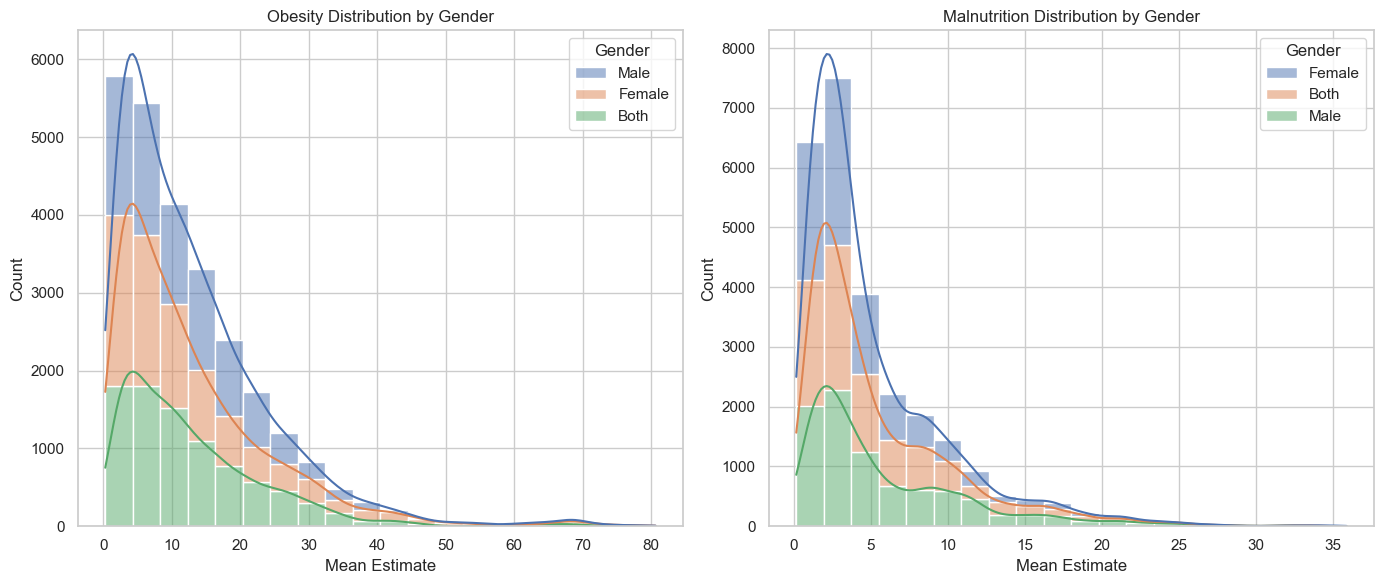

In [105]:
# Visualize Distributions
# Histogram for Mean_Estimate

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(data=df_obesity, x="Mean_Estimate", kde=True, hue="Gender", multiple="stack", bins=20, ax=axes[0])
axes[0].set_title("Obesity Distribution by Gender")
axes[0].set_xlabel("Mean Estimate")

sns.histplot(data=df_malnutrition, x="Mean_Estimate", kde=True, hue="Gender", multiple="stack", bins=20, ax=axes[1])
axes[1].set_title("Malnutrition Distribution by Gender")
axes[1].set_xlabel("Mean Estimate")

plt.tight_layout()
plt.show()

1. Obesity Distribution by Gender
    - Most obesity values fall between 5 and 20, with the highest number around 10.
    - Males generally have slightly higher obesity levels than females.
---
2. Malnutrition Distribution by Gender
    - Most malnutrition values are between 2 and 6, peaking around 3 to 4.
    - Males also show slightly higher malnutrition levels compared to females.
---
3. Key Observations
    - Both obesity and malnutrition are more common at lower values, meaning most people fall into the mild to moderate range.
    - Males have higher counts in both obesity and malnutrition categories compared to females.
    - Very high values of both malnutrition and obesity are rare, but they do exist.

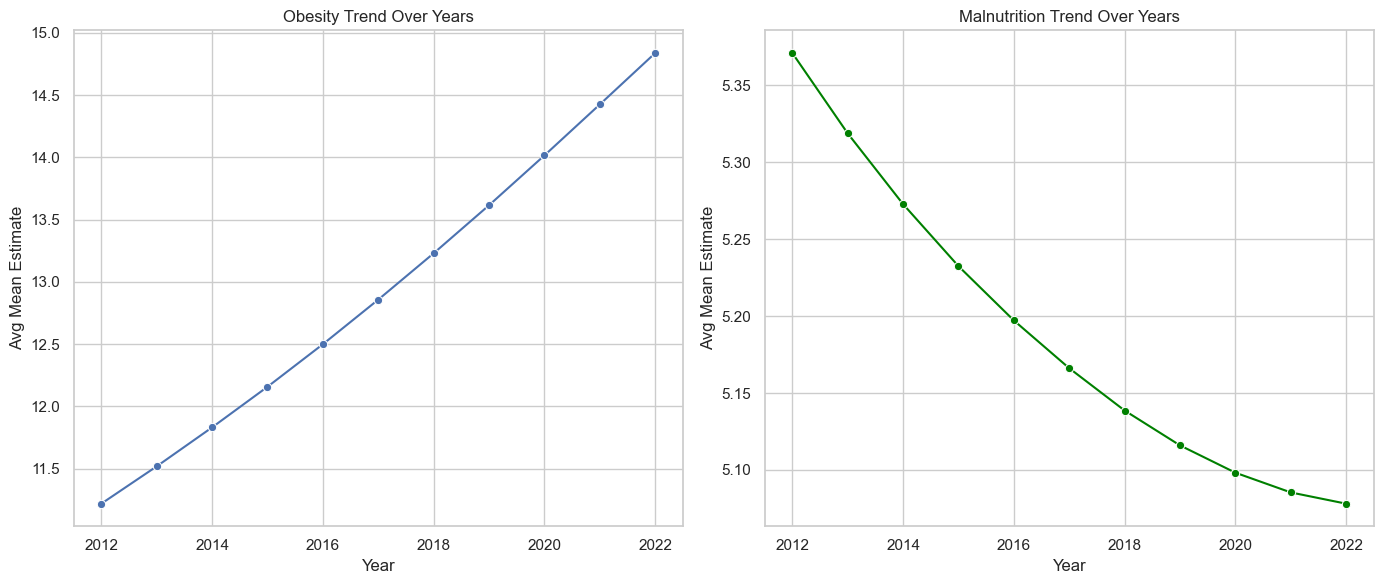

In [107]:
# Time Trends
# Line Plot: Mean Estimate over Year (aggregated)

# Calculate trends
obesity_trend = df_obesity.groupby("Year")["Mean_Estimate"].mean().reset_index()
malnutrition_trend = df_malnutrition.groupby("Year")["Mean_Estimate"].mean().reset_index()

# Subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Obesity trend
sns.lineplot(data=obesity_trend, x="Year", y="Mean_Estimate", marker="o", ax=axes[0])
axes[0].set_title("Obesity Trend Over Years")
axes[0].set_ylabel("Avg Mean Estimate")

# Malnutrition trend
sns.lineplot(data=malnutrition_trend, x="Year", y="Mean_Estimate", marker="o", color='green', ax=axes[1])
axes[1].set_title("Malnutrition Trend Over Years")
axes[1].set_ylabel("Avg Mean Estimate")

plt.tight_layout()
plt.show()

1. Obesity Trend Over Years
    - The chart shows a steady and sharp increase in the average obesity estimates over the decade.
    - The average obesity rate grew from approximately 11.2 in 2012 to nearly 15.0 in 2022.
    - The growth is consistent and almost linear, indicating a worsening obesity problem year after year.
    - This rise reflects a global health concern, possibly linked to urbanization, lifestyle changes, and dietary shifts.
---
2. Malnutrition Trend Over Years
    - In contrast, the average malnutrition estimate has been gradually declining from 5.37 in 2012 to about 5.08 in 2022.
    - The decline is slow and subtle, with the curve flattening more in the later years.
    - While it's a positive sign that malnutrition is reducing, the pace is much slower than the rise in obesity.
    - This might suggest that efforts to combat undernutrition are working, but not strongly enough, especially when compared to the rapid obesity trend.
---
3. Key Observations
    - The decline in malnutrition is a positive sign, but the rapid rise in obesity is a major concern.
    - This reflects a nutrition paradox: while undernutrition issues are improving, overnutrition (obesity) is increasing significantly.

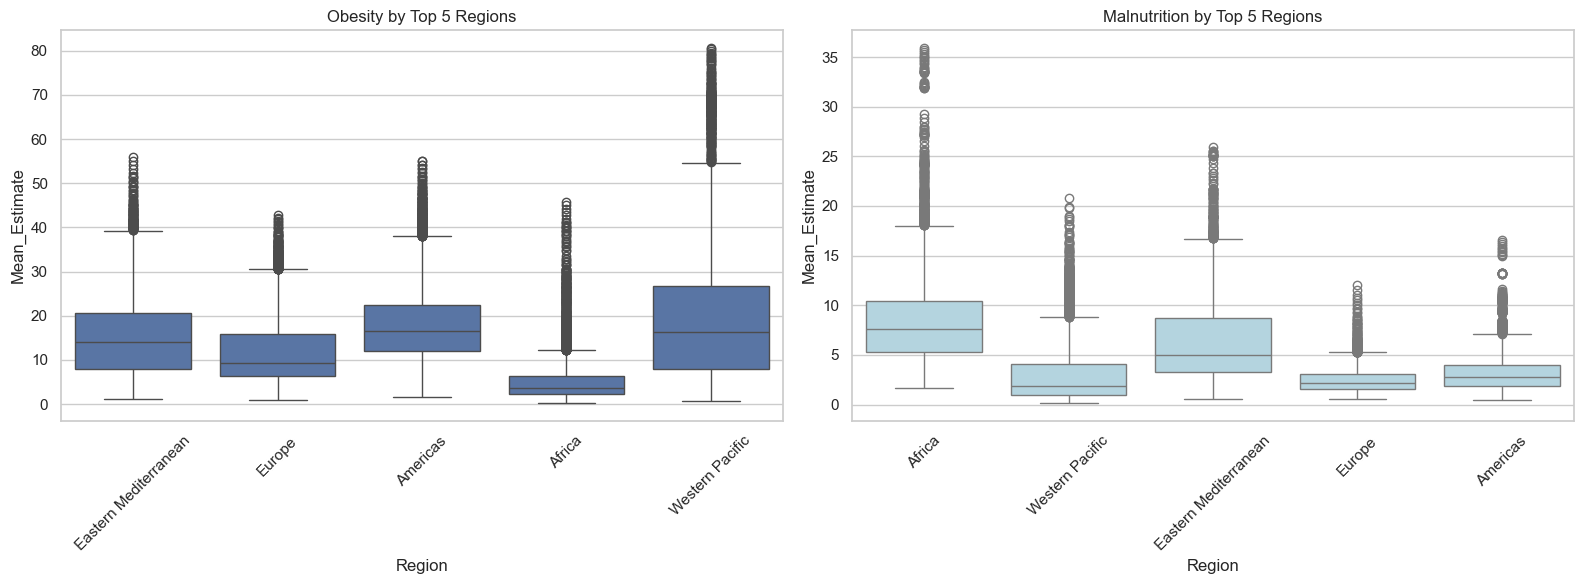

In [109]:
# Regional Comparison
# Box Plot: Mean Estimate by Region

top_regions_obesity = df_obesity['Region'].value_counts().nlargest(5).index
top_regions_mal = df_malnutrition['Region'].value_counts().nlargest(5).index

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(data=df_obesity[df_obesity['Region'].isin(top_regions_obesity)],
            x="Region", y="Mean_Estimate", ax=axes[0])
axes[0].set_title("Obesity by Top 5 Regions")
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(data=df_malnutrition[df_malnutrition['Region'].isin(top_regions_mal)],
            x="Region", y="Mean_Estimate", ax=axes[1], color='lightblue')
axes[1].set_title("Malnutrition by Top 5 Regions")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

1. Obesity by Top 5 Regions
    - The Western Pacific and Americas show higher obesity levels with wide variation in values, including many high outliers.
    - Africa has the lowest obesity estimates, showing a tighter distribution with fewer outliers.
---
2. Malnutrition by Top 5 Regions
    - Africa has the highest malnutrition levels, with a broad spread and many extreme values.
    - Europe and the Americas show the lowest malnutrition levels, with most data clustered toward the lower end.
---
3. Key Observations
    - Obesity and malnutrition vary greatly by region, highlighting the global nutrition paradox: some regions struggle with excess while others face deficiency.
    - Regions like Africa show high malnutrition and low obesity, while regions like the Western Pacific show high obesity and lower malnutrition — indicating different public health priorities.

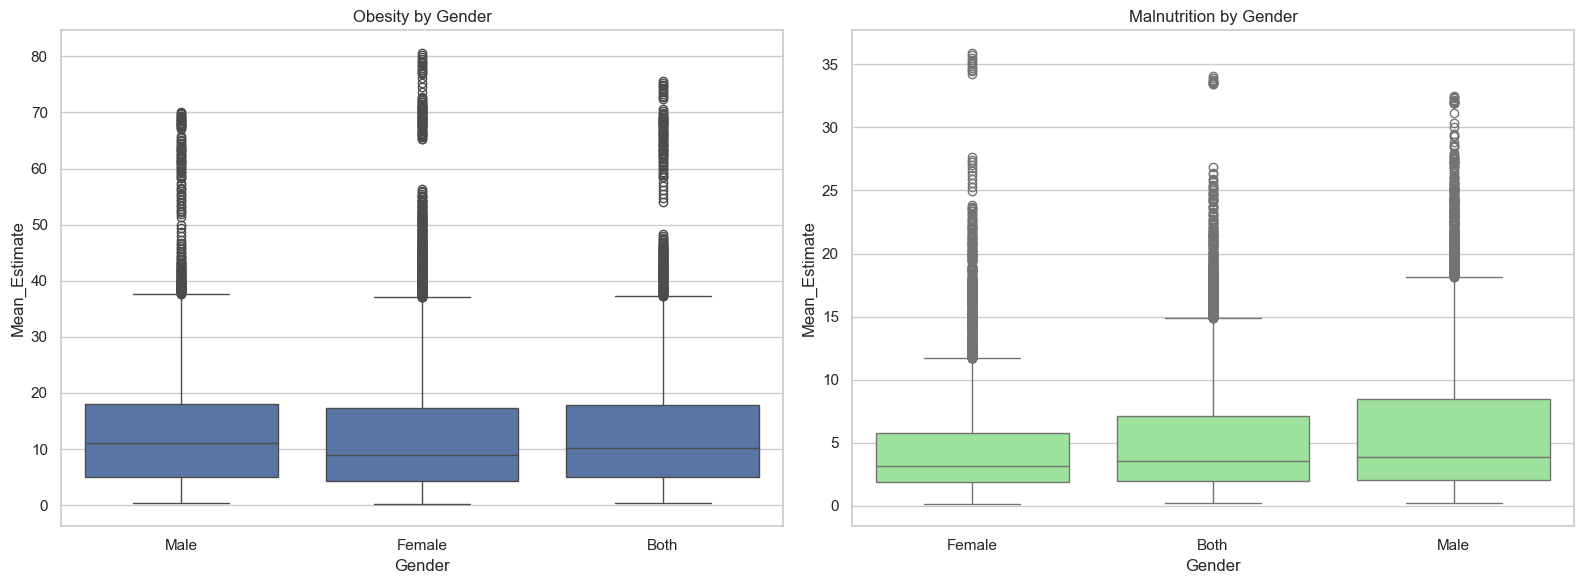

In [111]:
# Gender-wise Comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(data=df_obesity, x="Gender", y="Mean_Estimate", ax=axes[0])
axes[0].set_title("Obesity by Gender")

sns.boxplot(data=df_malnutrition, x="Gender", y="Mean_Estimate", ax=axes[1], color='lightgreen')
axes[1].set_title("Malnutrition by Gender")

plt.tight_layout()
plt.show()

1. Obesity by Gender
    - The obesity levels for Male, Female, and Both genders are very similar, with median values and spreads almost the same.
    - There are many outliers in each group, especially with high values, indicating some countries or cases with very high obesity rates.
---
2. Malnutrition by Gender
    - Male group shows a slightly higher median malnutrition level compared to Female and Both.
    - All gender categories have wider spread with many extreme outliers, especially in the Male category.
---
3. Key Observations
    - Gender doesn’t significantly impact obesity levels—the distributions are almost identical across groups.
    - For malnutrition, males appear slightly more affected on average, but the difference is small

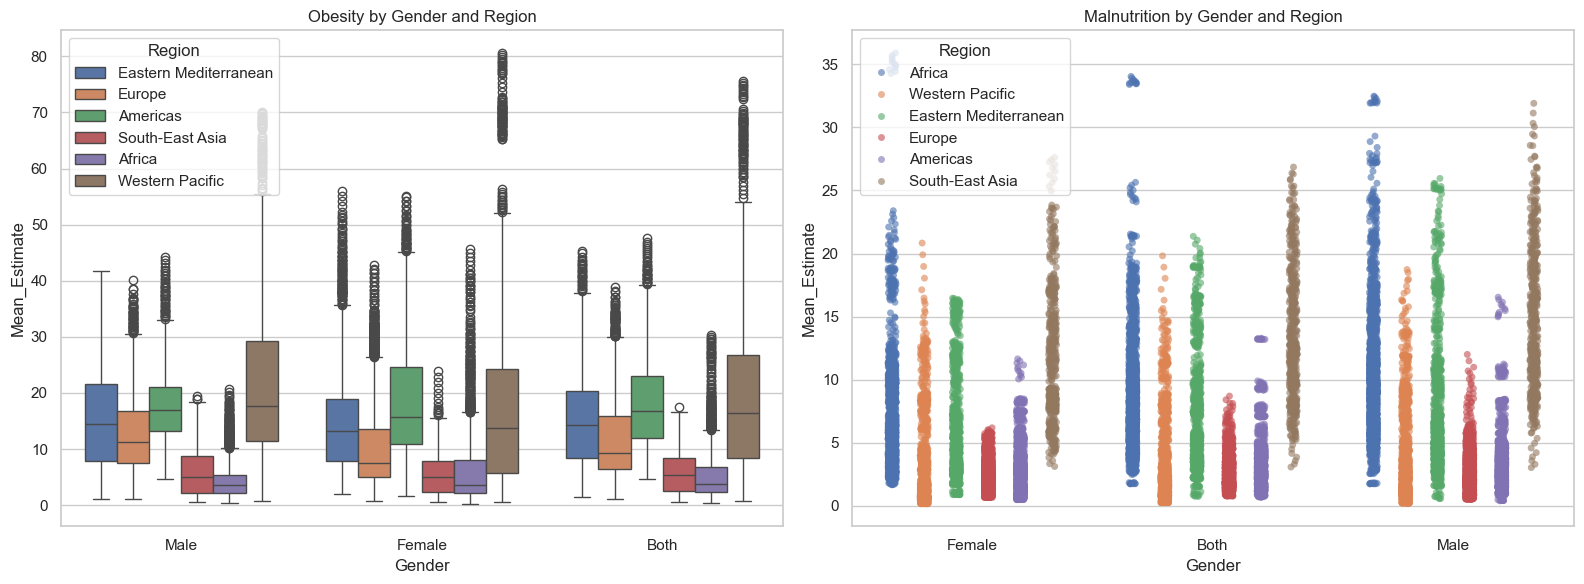

In [113]:
# Gender vs Region (Strip + Box Plot)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(data=df_obesity, x="Gender", y="Mean_Estimate", hue="Region", ax=axes[0])
axes[0].set_title("Obesity by Gender and Region")

sns.stripplot(data=df_malnutrition, x="Gender", y="Mean_Estimate", hue="Region",
              dodge=True, alpha=0.6, jitter=True, ax=axes[1])
axes[1].set_title("Malnutrition by Gender and Region")

plt.tight_layout()
plt.show()


1. Obesity by Gender and Region
    - Eastern Mediterranean and Western Pacific regions show higher obesity levels across all genders, especially in the "Both" and "Female" categories.
    - Africa and South-East Asia have the lowest obesity estimates, consistently across Male, Female, and Both genders.
---
2. Malnutrition by Gender and Region
    - Africa and South-East Asia regions show higher malnutrition values in all gender categories, indicating they are most affected.
    - Europe and Americans have lower malnutrition levels across all genders, with most values clustered at the bottom.
---
3. Key Observations
    - There is a clear regional influence on both obesity and malnutrition. Some regions (like Africa) struggle more with malnutrition, while others (like Eastern Mediterranean) face obesity issues.
    - Gender alone doesn’t cause big differences, but region combined with gender reveals important health patterns.

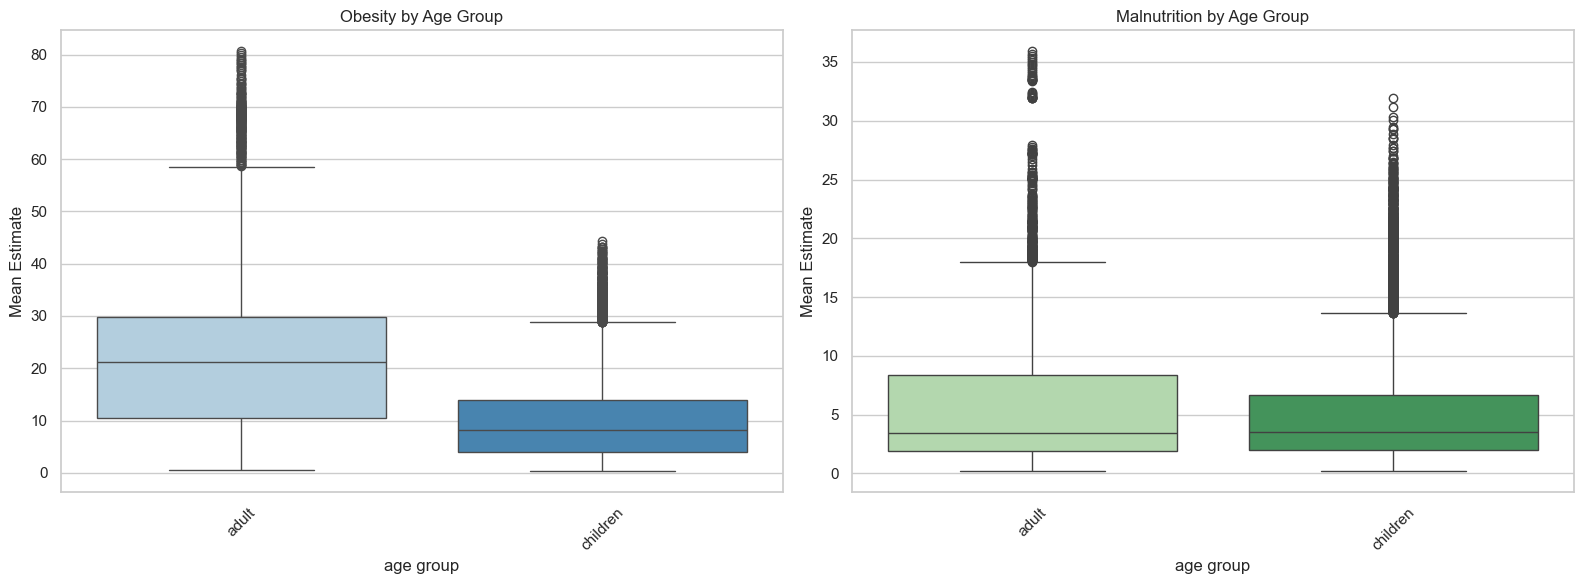

In [115]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Chart 1: Obesity by Age Group
sns.boxplot(data=df_obesity, x='age_group', y='Mean_Estimate', ax=axes[0], palette='Blues')
axes[0].set_title('Obesity by Age Group')
axes[0].set_ylabel('Mean Estimate')
axes[0].set_xlabel('age group')
axes[0].tick_params(axis='x', rotation=45)

# Chart 2: Malnutrition by Age Group
sns.boxplot(data=df_malnutrition, x='age_group', y='Mean_Estimate', ax=axes[1], palette='Greens')
axes[1].set_title('Malnutrition by Age Group')
axes[1].set_ylabel('Mean Estimate')
axes[1].set_xlabel('age group')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

1. Obesity by Age Group
    - Adults have clearly higher obesity estimates than children.
    - Children have lower and more consistent obesity levels with fewer extreme values.
---
2. Malnutrition by Age Group
    - Adults have slightly higher malnutrition estimates on average compared to children, as shown by a slightly higher median line in the boxplot.
    - It indicating that some children are facing more severe malnutrition.
---
3. Key Observations
    - Obesity is much more prevalent in adults, both in terms of average and variability.
    - Malnutrition affects adults slightly more on average, but children still experience notable extreme cases.

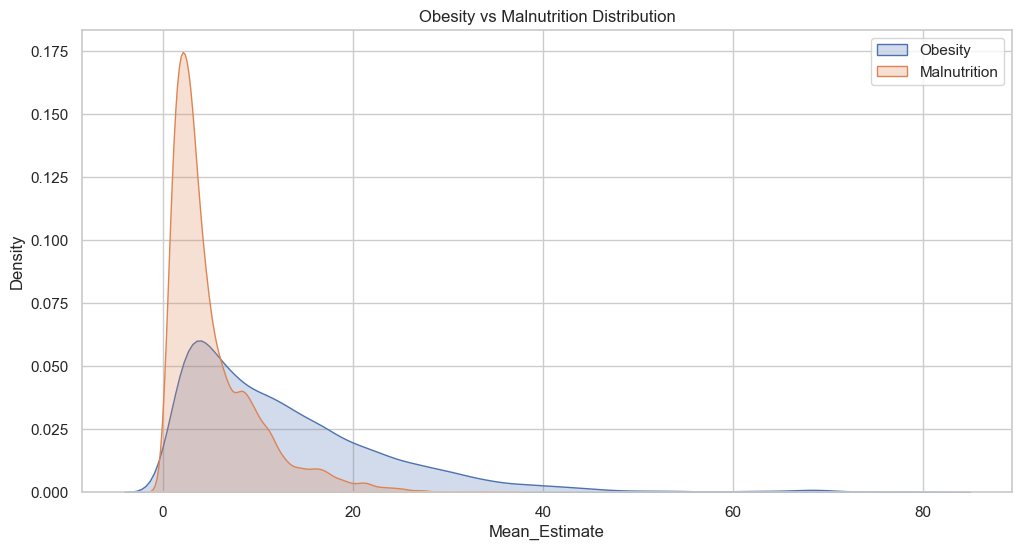

In [117]:
# Compare Obesity vs Malnutrition
# Overlay Distributions

sns.kdeplot(df_obesity["Mean_Estimate"], label='Obesity', shade=True)
sns.kdeplot(df_malnutrition["Mean_Estimate"], label='Malnutrition', shade=True)
plt.title("Obesity vs Malnutrition Distribution")
plt.legend()
plt.show()

1. Key Observations
    - Malnutrition estimates are highly concentrated at lower values (mostly between 0–10), indicating it is generally present at lower levels across populations.
    - Obesity estimates have a wider distribution and extend to much higher values, showing greater variability and suggesting that some populations experience significantly higher obesity rates.

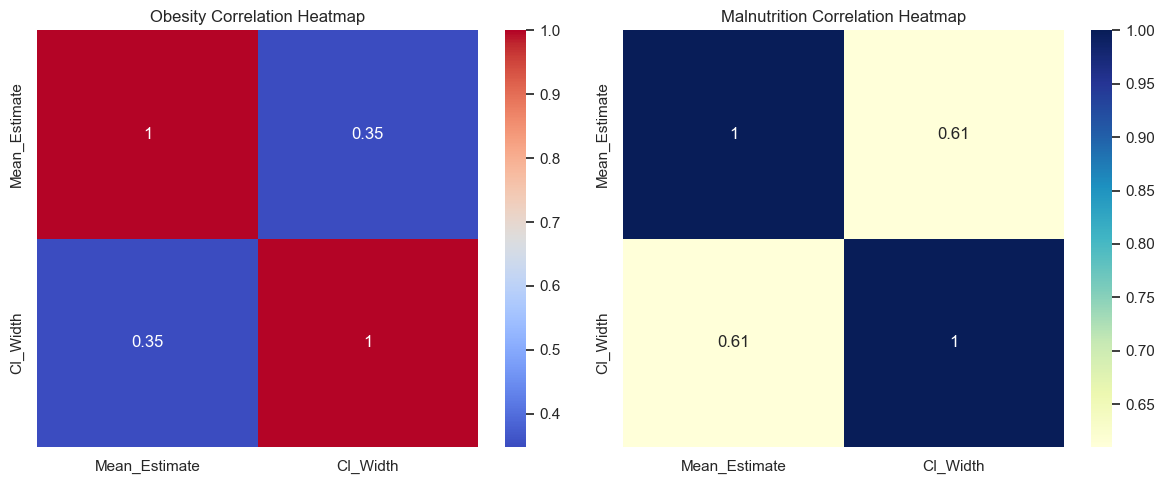

In [119]:
# Heatmap of CI Width vs Mean Estimate (Correlation)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Correlation heatmap for obesity
sns.heatmap(df_obesity[["Mean_Estimate", "CI_Width"]].corr(), annot=True, cmap="coolwarm", ax=axes[0])
axes[0].set_title("Obesity Correlation Heatmap")

# # Correlation heatmap for malnutrition
sns.heatmap(df_malnutrition[["Mean_Estimate", "CI_Width"]].corr(), annot=True, cmap="YlGnBu", ax=axes[1])
axes[1].set_title("Malnutrition Correlation Heatmap")

plt.tight_layout()
plt.show()

- This chart shows how two numbers are related: the average value and its confidence interval (CI width).

- The color shows if they go up or down together (dark = strong relation, light = weak).

- In both obesity and malnutrition, the connection is weak, so we can trust the average values more.

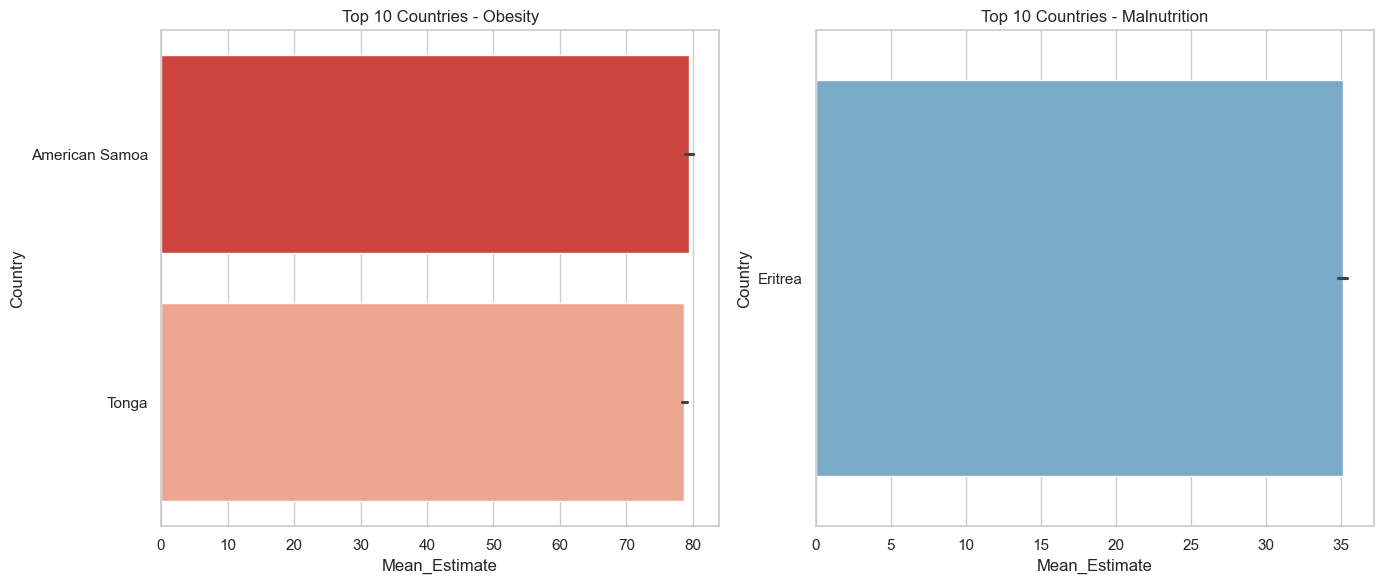

In [121]:
# Identify Top/Bottom Countries

top_obesity = df_obesity.sort_values(by="Mean_Estimate", ascending=False).head(10)
top_malnutrition = df_malnutrition.sort_values(by="Mean_Estimate", ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Top 10 Countries with Highest Obesity
sns.barplot(data=top_obesity, x="Mean_Estimate", y="Country", palette="Reds_r", ax=axes[0])
axes[0].set_title("Top 10 Countries - Obesity")

# Bottom 10 Countries with Highest Malnutrition
sns.barplot(data=top_malnutrition, x="Mean_Estimate", y="Country", palette="Blues_r", ax=axes[1])
axes[1].set_title("Top 10 Countries - Malnutrition")

plt.tight_layout()
plt.show()

1. Top 10 Countries – Obesity
    - American Samoa and Tonga have the highest average obesity rates, both close to 80%.
    - These countries significantly exceed global obesity levels.
---
2. Top 10 Countries – Malnutrition
    - Eritrea has the highest average malnutrition rate at approximately 35%.
---
3. Key Observations
    - Obesity is highly concentrated in Pacific Island nations like American Samoa and Tonga, suggesting regional lifestyle and dietary factors.
    - Malnutrition remains severe in low-income African nations such as Eritrea, pointing to ongoing issues with food insecurity and poverty.

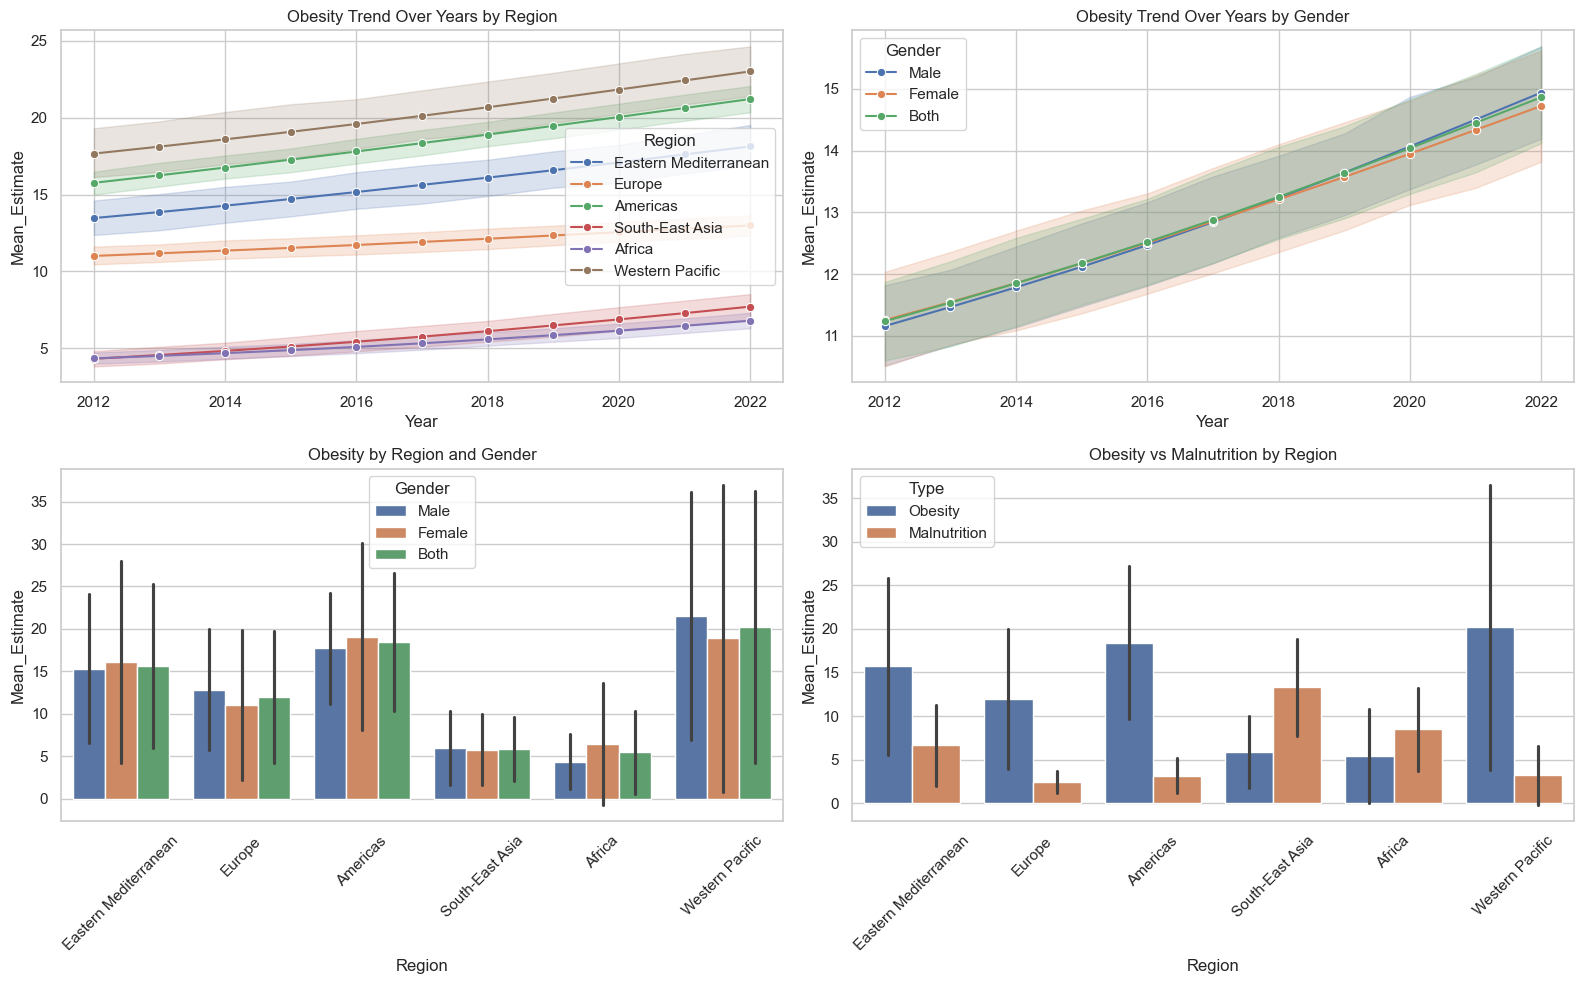

In [123]:
# Create 2x2 subplot figure
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# 1. Obesity Trend Over Years by Region
sns.lineplot(data=df_obesity, x='Year', y='Mean_Estimate', hue='Region', ax=axs[0, 0], marker="o")
axs[0, 0].set_title('Obesity Trend Over Years by Region')

# 2. Obesity Trend Over Years by Gender
sns.lineplot(data=df_obesity, x='Year', y='Mean_Estimate', hue='Gender', ax=axs[0, 1], marker="o")
axs[0, 1].set_title('Obesity Trend Over Years by Gender')

# 3. Obesity by Region and Gender
sns.barplot(data=df_obesity, x='Region', y='Mean_Estimate', hue='Gender', ax=axs[1, 0], ci='sd')
axs[1, 0].set_title('Obesity by Region and Gender')
axs[1, 0].tick_params(axis='x', rotation=45)

# 4. Obesity vs Malnutrition by Region
# Prepare combined data
df_obesity_temp = df_obesity[['Region', 'Mean_Estimate', 'CI_Width']].copy()
df_obesity_temp['Type'] = 'Obesity'

df_malnutrition_temp = df_malnutrition[['Region', 'Mean_Estimate', 'CI_Width']].copy()
df_malnutrition_temp['Type'] = 'Malnutrition'

df_combined = pd.concat([df_obesity_temp, df_malnutrition_temp])

sns.barplot(data=df_combined, x='Region', y='Mean_Estimate', hue='Type', ax=axs[1, 1], ci='sd')
axs[1, 1].set_title('Obesity vs Malnutrition by Region')
axs[1, 1].tick_params(axis='x', rotation=45)

# Final layout and show
plt.tight_layout()
plt.show()

1. Obesity Trend Over Years by Region
    - Obesity has been increasing steadily in all regions from 2012 to 2022.
    - Africa and Western Pacific show the highest rise in obesity levels over time.
    - Regions like Europe and Eastern Mediterranean have moderate growth, but the trend is still going up.
---
2. Obesity Trend Over Years by Gender
    - All genders (Male, Female, Both) show a steady increase in obesity over time.
    - Female group has a slightly lesser obesity rate compared to males and both genders combined.
    - The increase is consistent and clear, with not much difference between genders, but still showing growth.
---
3. Obesity by Region and Gender
    - Americas and Western Pacific regions have higher obesity rates across all genders.
    - Africa and South-East Asia show lower obesity rates, regardless of gender.
    - Differences between Male, Female, and Both groups are small within each region but visible in some areas.
---
4. Obesity vs Malnutrition by Region
    - In most regions, obesity rates are higher than malnutrition (e.g., Americas, Europe, Western Pacific).
    - South-East Asia and Africa show higher malnutrition compared to obesity, which is a sign of the nutrition paradox.
    - This chart clearly shows how some regions struggle with both obesity and malnutrition at the same time, just in different groups or countries.

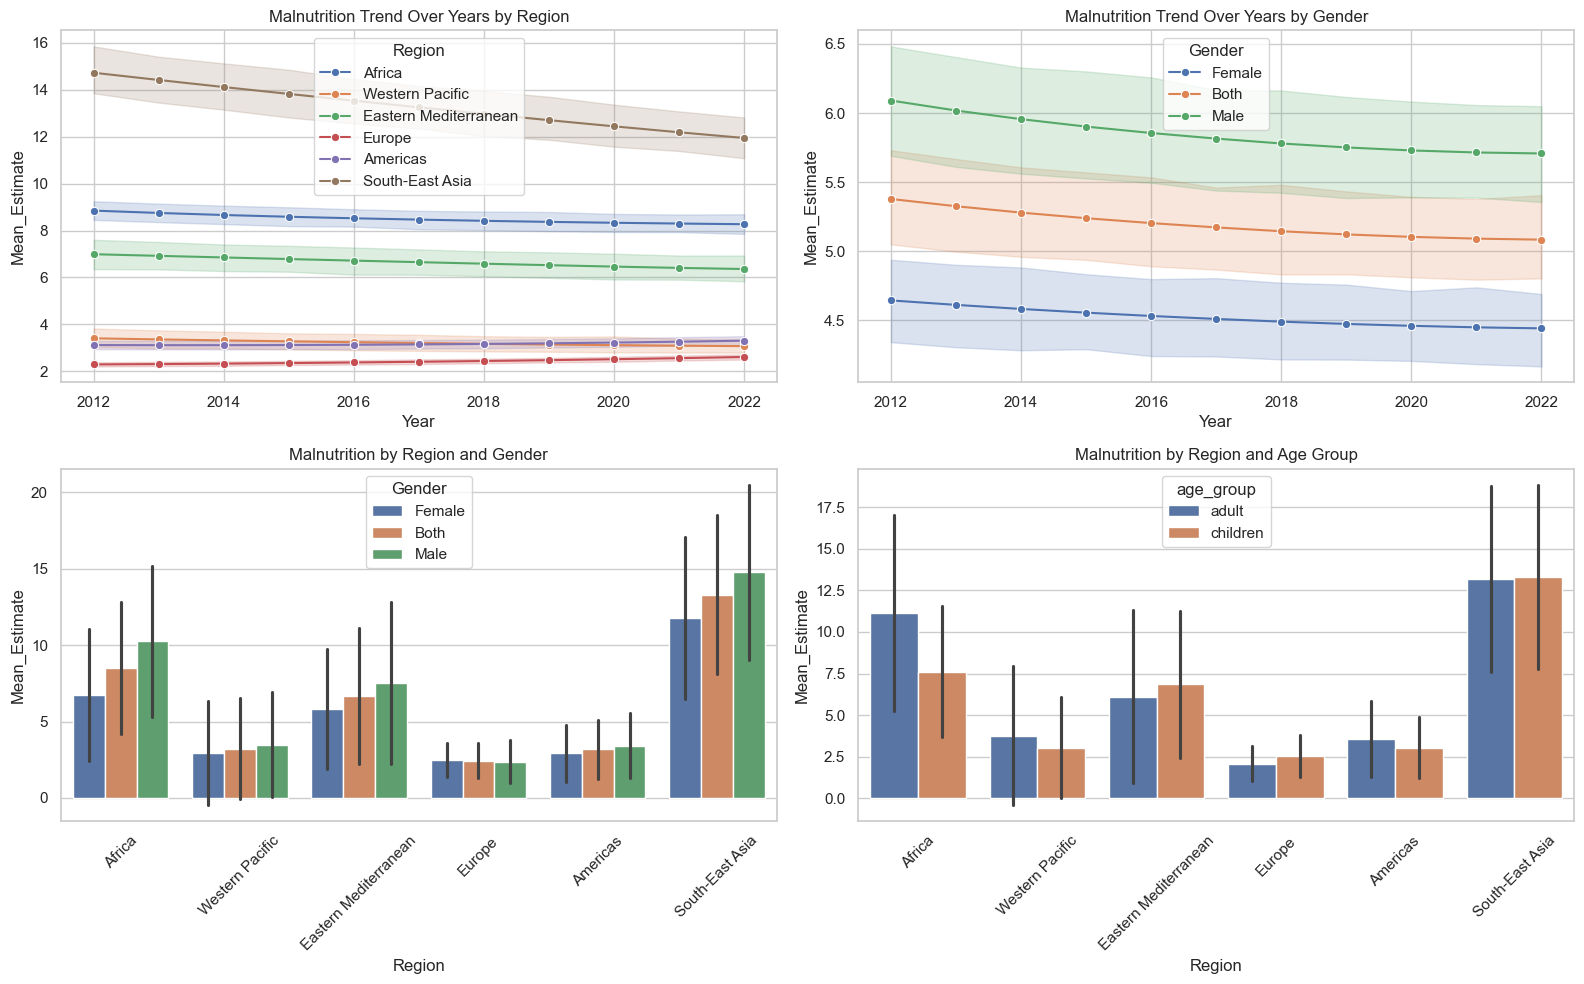

In [125]:
# Create figure and axes
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# 1. Malnutrition Trend Over Years by Region
sns.lineplot(data=df_malnutrition, x='Year', y='Mean_Estimate', hue='Region', ax=axs[0, 0], marker='o')
axs[0, 0].set_title('Malnutrition Trend Over Years by Region')

# 2. Malnutrition Trend Over Years by Gender
sns.lineplot(data=df_malnutrition, x='Year', y='Mean_Estimate', hue='Gender', ax=axs[0, 1], marker='o')
axs[0, 1].set_title('Malnutrition Trend Over Years by Gender')

# 3. Malnutrition by Region and Gender
sns.barplot(data=df_malnutrition, x='Region', y='Mean_Estimate', hue='Gender', ax=axs[1, 0], ci='sd')
axs[1, 0].set_title('Malnutrition by Region and Gender')
axs[1, 0].tick_params(axis='x', rotation=45)

# 4. Malnutrition by Region and Age Group
sns.barplot(data=df_malnutrition, x='Region', y='Mean_Estimate', hue='age_group', ax=axs[1, 1], ci='sd')
axs[1, 1].set_title('Malnutrition by Region and Age Group')
axs[1, 1].tick_params(axis='x', rotation=45)

# Final adjustments
plt.tight_layout()
plt.show()


1. Malnutrition Trend Over Years by Region
    - South-East Asia has the highest malnutrition levels over time, but it is slowly decreasing.
    - Africa and Eastern Mediterranean also show higher levels, though slightly lower than South-East Asia.
    - Europe and Americas have consistently low malnutrition levels over the years.
---
2. Malnutrition Trend Over Years by Gender
    - All genders show a decreasing trend in malnutrition levels from 2012 to 2022.
    - Males have slightly higher malnutrition levels than females.
---
3. Malnutrition by Region and Gender
    - South-East Asia has high malnutrition across all genders, especially in males.
    - Africa also shows high levels, with males having the highest values.
    - Europe and Americas have the lowest malnutrition levels across genders.
---
4. Malnutrition by Region and Age Group
    - In most regions, adults have higher malnutrition levels than children.
    - South-East Asia and Africa show very high adult malnutrition compared to others.
    - Europe again shows very low levels of malnutrition for both age groups.

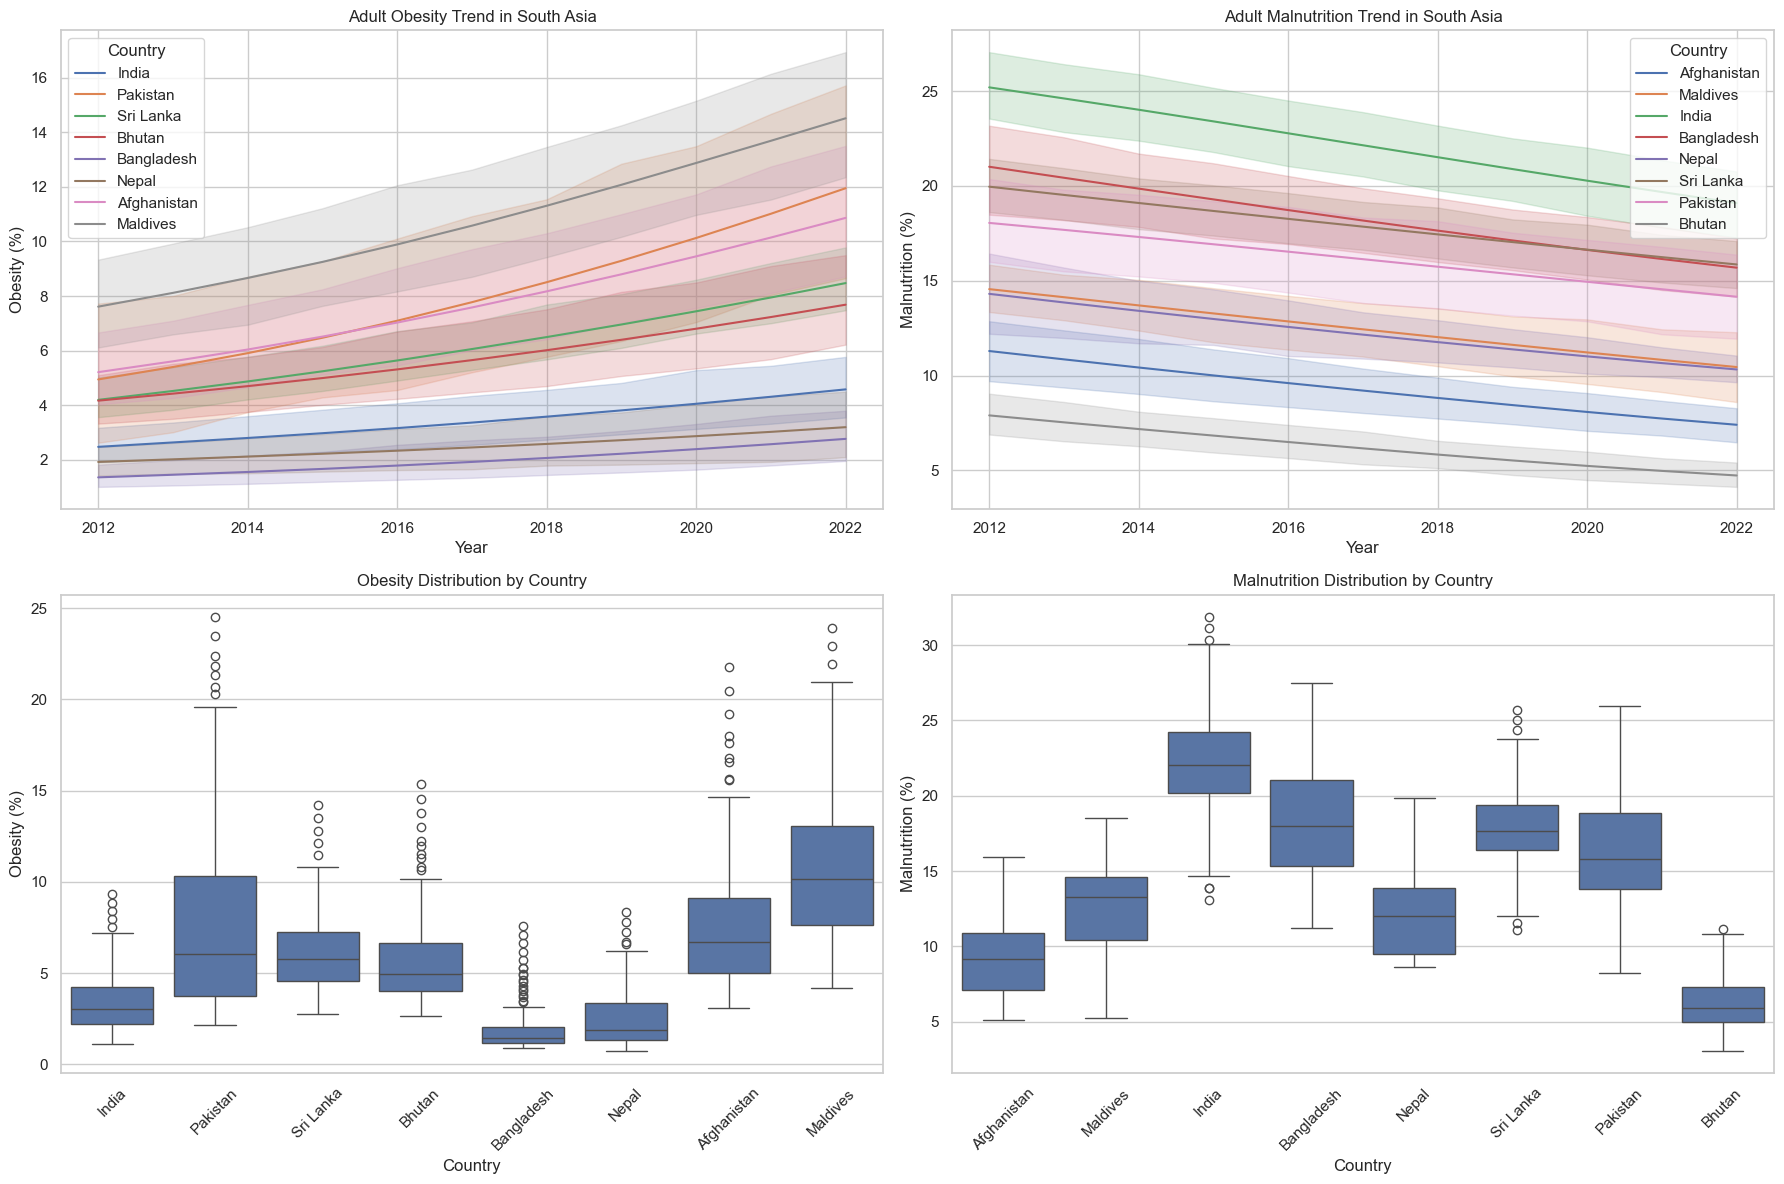

In [127]:
# Define South Asian countries
south_asia_countries = [
    "India", "Bangladesh", "Pakistan", "Nepal", "Sri Lanka", "Bhutan", "Maldives", "Afghanistan"
]

# Filter for South Asia
obesity_sa = df_obesity[df_obesity["Country"].isin(south_asia_countries)]
malnutrition_sa = df_malnutrition[df_malnutrition["Country"].isin(south_asia_countries)]

fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: Adult Obesity Trend
sns.lineplot(data=obesity_sa, x="Year", y="Mean_Estimate", hue="Country", ax=axs[0, 0])
axs[0, 0].set_title("Adult Obesity Trend in South Asia")
axs[0, 0].set_ylabel("Obesity (%)")

# Plot 2: Adult Malnutrition Trend
sns.lineplot(data=malnutrition_sa, x="Year", y="Mean_Estimate", hue="Country", ax=axs[0, 1])
axs[0, 1].set_title("Adult Malnutrition Trend in South Asia")
axs[0, 1].set_ylabel("Malnutrition (%)")

# Plot 3: Boxplot of Obesity Distribution
sns.boxplot(data=obesity_sa, x="Country", y="Mean_Estimate", ax=axs[1, 0])
axs[1, 0].set_title("Obesity Distribution by Country")
axs[1, 0].set_ylabel("Obesity (%)")
axs[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Boxplot of Malnutrition Distribution
sns.boxplot(data=malnutrition_sa, x="Country", y="Mean_Estimate", ax=axs[1, 1])
axs[1, 1].set_title("Malnutrition Distribution by Country")
axs[1, 1].set_ylabel("Malnutrition (%)")
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

1. Adult Obesity Trend in South Asia (Line Plot - Left Top)
    - All South Asian countries show a consistent rise in adult obesity rates from 2012 to 2022.
    - Maldives and Afghanistan have the highest obesity rates in recent years.
    - India’s Position: India shows a moderate but growing obesity trend, staying below 6% by 2022.
---
2. Adult Malnutrition Trend in South Asia (Line Plot - Right Top)
    - Adult malnutrition is decreasing steadily across all South Asian countries over time.
    - Bangladesh and Pakistan started with the highest malnutrition rates, though showing gradual improvement.
    - India’s Position: India’s malnutrition rate is reducing slowly, but it remains among the middle group in the region.
---
3. Obesity Distribution by Country (Box Plot - Bottom Left)
    - Pakistan shows the widest range and most variation in obesity values.
    - India’s obesity levels are relatively low and less varied, indicating a consistent pattern.
    - These countries have higher average obesity rates, possibly due to urban lifestyle changes.
---
4. Malnutrition Distribution by Country (Box Plot - Bottom Right)
    - India shows a wide range of malnutrition, with some extremely high cases.
    - Bhutan has the lowest levels and least variation in adult malnutrition.
    - Countries like Afghanistan and Nepal display steady mid-range levels without extreme outliers.
---
5. **About India**
    - India shows a gradual increase in adult obesity but remains below many other South Asian nations.
    - Malnutrition is decreasing over time, though it still exists significantly, especially in some regions.
    - Compared to others, India lies in the middle range for both obesity and malnutrition rates.
    - The dual burden (both obesity and malnutrition) coexists, indicating a need for balanced health interventions.

In [210]:
df_obesity.to_csv('df_obesity.csv', index=False)
df_malnutrition.to_csv('df_malnutrition.csv', index=False)